# Neural Network Classification Problems

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Binary Class Classification

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=10000

X,y= make_circles(n_samples,noise=0.03, random_state=42)

In [54]:
X[:5]

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       [ 0.98478298, -0.32517879],
       [ 0.82993028, -0.54722305]])

In [55]:
y[:5]

array([1, 0, 0, 0, 0])

### Visualizing the data

In [56]:
circles=pd.DataFrame({"X_0": X[:,0], "X_1": X[:,1], "label":y})
circles[:5]

,X_0,X_1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0


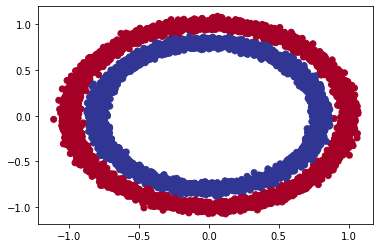

In [57]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [58]:
X.shape, y.shape

((10000, 2), (10000,))

In [59]:
len(X), len(y)

(10000, 10000)

In [60]:
X[:5]

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       [ 0.98478298, -0.32517879],
       [ 0.82993028, -0.54722305]])

In [61]:
y[:5]

array([1, 0, 0, 0, 0])

In [62]:
X[0], y[0]

(array([0.0464692 , 0.82477834]), 1)

In [63]:
X[1], y[1]

(array([ 1.00506323, -0.43335153]), 0)

In [64]:
X[2], y[2]

(array([-0.58348442,  0.79452834]), 0)

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((7000, 2), (3000, 2), (7000,), (3000,))

In [66]:
model= tf.keras.Sequential([
          tf.keras.Input(shape=(2,)),
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model.fit(X_train,y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.5626
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.7344
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.9441
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.9874
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.9943
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.9953
Epoch 7/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.9979
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.9997
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.9997
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9990

In [67]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.2101 - accuracy: 1.0000


[0.2100987583398819, 1.0]

### Non_linear Activation Function

> All of the activation fuctions except the *linear* function are non-linear activation functions.

In [68]:
model_linear= tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation="linear"),
])

model_linear.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model_linear.fit(X_train,y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 1ms/step - loss: 6.5547 - accuracy: 0.4864
Epoch 2/10
219/219 [==============================] - 0s 1ms/step - loss: 6.5441 - accuracy: 0.4883
Epoch 3/10
219/219 [==============================] - 0s 1ms/step - loss: 6.5312 - accuracy: 0.4886
Epoch 4/10
219/219 [==============================] - 0s 1ms/step - loss: 6.5192 - accuracy: 0.4879
Epoch 5/10
219/219 [==============================] - 0s 1ms/step - loss: 6.5226 - accuracy: 0.4870
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 6.5064 - accuracy: 0.4861
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 6.4965 - accuracy: 0.4863
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 6.4879 - accuracy: 0.4859
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 6.4803 - accuracy: 0.4851
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 6.4708 - accuracy: 0.4853

In [69]:
model_linear.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 6.2966 - accuracy: 0.4967


[6.296576976776123, 0.49666666984558105]

In [70]:
model_1= tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


history=model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4801
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4986
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5161
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5234
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5364
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5771
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6307
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6800
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7413
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5579 - accura

In [71]:
model_1.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.9977


[0.010701262392103672, 0.9976666569709778]

### Improving the model

In [72]:
model_2= tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])


history=model_2.fit(X_train,y_train, epochs=25)

Epoch 1/25
219/219 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5406
Epoch 2/25
219/219 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7494
Epoch 3/25
219/219 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9499
Epoch 4/25
219/219 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9951
Epoch 5/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9961
Epoch 6/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9963
Epoch 7/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9944
Epoch 8/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9954
Epoch 9/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9940
Epoch 10/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9943

In [73]:
model_2.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9950


[0.014598418958485126, 0.9950000047683716]

### Plot the loss or training curves

In [74]:
history.history

{'accuracy': [0.5405714511871338,
  0.7494285702705383,
  0.9498571157455444,
  0.9951428771018982,
  0.9961428642272949,
  0.9962857365608215,
  0.9944285750389099,
  0.9954285621643066,
  0.9940000176429749,
  0.9942857027053833,
  0.9942857027053833,
  0.9945714473724365,
  0.9928571581840515,
  0.9937142729759216,
  0.9938571453094482,
  0.9934285879135132,
  0.9947142601013184,
  0.9947142601013184,
  0.9944285750389099,
  0.9940000176429749,
  0.99314284324646,
  0.9924286007881165,
  0.993571400642395,
  0.99528568983078,
  0.993571400642395],
 'loss': [0.6846480965614319,
  0.5407828092575073,
  0.2797698974609375,
  0.10196612030267715,
  0.058028411120176315,
  0.04145830497145653,
  0.03084878996014595,
  0.025933988392353058,
  0.02566511370241642,
  0.02226138301193714,
  0.02053166925907135,
  0.01809973269701004,
  0.02236124314367771,
  0.018686823546886444,
  0.018734270706772804,
  0.018523214384913445,
  0.01578819379210472,
  0.01585187390446663,
  0.016838980838656

In [75]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684648,0.540571
1,0.540783,0.749429
2,0.279770,0.949857
3,0.101966,0.995143
4,0.058028,0.996143
5,0.041458,0.996286
6,0.030849,0.994429
7,0.025934,0.995429
8,0.025665,0.994000
9,0.022261,0.994286


Text(0.5, 1.0, 'Model_2 Loss Curve')

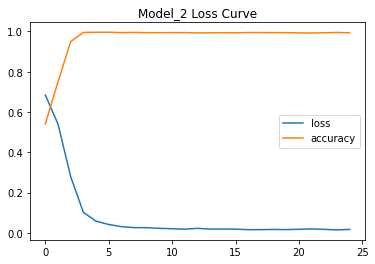

In [76]:
pd.DataFrame(history.history).plot()
plt.title("Model_2 Loss Curve")

### Find the ideal/best learning rate

**Steps**

* Learning rate **callback** is an extra piece of functionality, which we can add *while* the model is training.

* Build another model

* Modified lost curve plot

In [77]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3=model_3.fit(X_train,y_train, epochs=100, callbacks=[lr_callback])

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4989 - lr: 1.0000e-04
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5046 - lr: 1.1220e-04
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5221 - lr: 1.2589e-04
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5264 - lr: 1.4125e-04
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5334 - lr: 1.5849e-04
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5361 - lr: 1.7783e-04
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5449 - lr: 1.9953e-04
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5494 - lr: 2.2387e-04
Epoch 9/100
219/219 [==============================] - 0

In [78]:
model_3.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 1.0935 - accuracy: 0.4870


[1.0934902429580688, 0.4869999885559082]

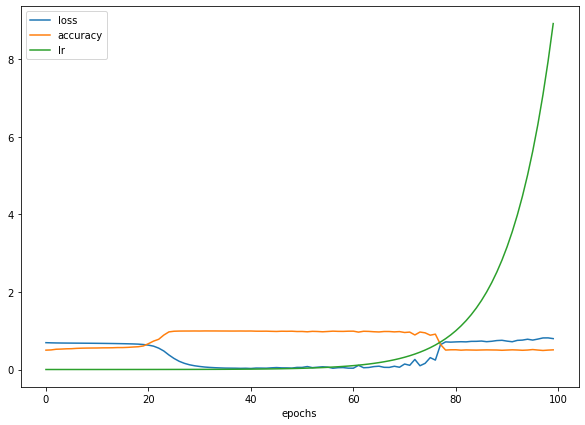

In [79]:
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel="epochs")

### Learning rate VS Loss

In [80]:
lrs=  1e-4 *(10** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [81]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate VS Loss')

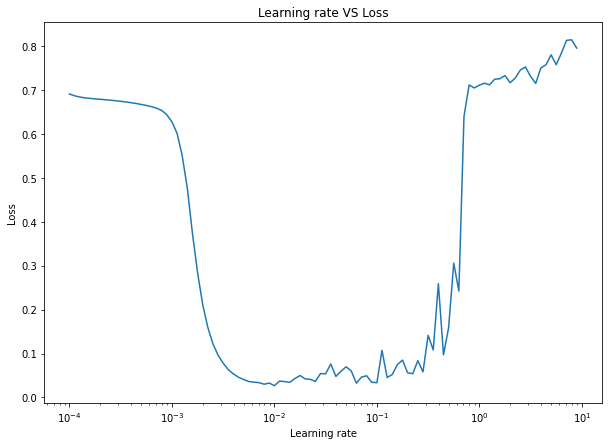

In [82]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate VS Loss")

### Examples of some usual learning rate

In [83]:
10**0, 10**-1, 10**-2,10**-3,10**-4, 1e-4 

(1, 0.1, 0.01, 0.001, 0.0001, 0.0001)

In [84]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), metrics=["accuracy"])

history_4=model_4.fit(X_train,y_train, epochs=25)

Epoch 1/25
219/219 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8141
Epoch 2/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9790
Epoch 3/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9859
Epoch 4/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9821
Epoch 5/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9809
Epoch 6/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9890
Epoch 7/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9847
Epoch 8/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9876
Epoch 9/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9899
Epoch 10/25
219/219 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9866

In [85]:
model_4.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9733


[0.07235588133335114, 0.9733333587646484]

### Confusion Matrix

In [86]:
y_preds= model_4.predict(X_test)
y_preds

array([[9.9988073e-01],
       [9.9988073e-01],
       [1.4587890e-07],
       ...,
       [8.4691346e-03],
       [9.9987620e-01],
       [9.9988073e-01]], dtype=float32)

#### Probability Predictions

> Looks like the *y_preds* are in the form of *prediction_probability*, we need to change it in the shape of *y_test*. THis is the standard output from the *sigmoid* or *softmax* activation function.

In [87]:
y_preds_standard= np.round(y_preds)
y_preds_standard[:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [88]:
y_preds_tf= tf.round(y_preds)
y_preds_tf[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [89]:
y_test.shape, y_preds.shape,y_preds_tf.shape

((3000,), (3000, 1), TensorShape([3000, 1]))

In [90]:
y_test[:5]

array([1, 1, 0, 1, 0])

In [91]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_preds_tf)
cm

array([[1467,   72],
       [   8, 1453]])

### Using Seaborn Library

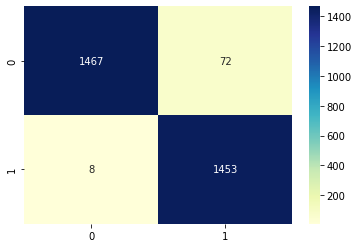

In [92]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

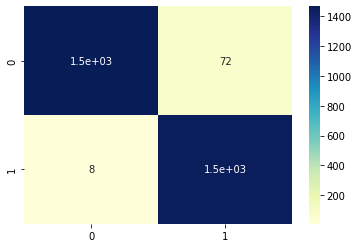

In [93]:
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Multi-class Classification

> When there are more than two classes.

In [94]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import PIL
import PIL.Image

import matplotlib.pyplot as plt

### Getting data ready

In [138]:
(X_train,y_train), (X_test,y_test)=fashion_mnist.load_data()

In [142]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [143]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [144]:
X_train[0].shape

(28, 28)

In [145]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

#### Visualizing an image

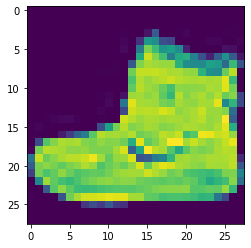

In [146]:
plt.imshow(X_train[0])

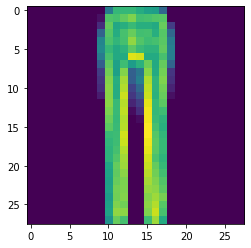

In [147]:
plt.imshow(X_train[69])

In [148]:
X_test[69]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  54,
        162, 186, 189, 138,   0,   0,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 135, 227,
         44,   0,   0,  94, 239,  47,   0,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   1,   0,   0,   0,   2,   0,  69, 184,   0,
          0,   0,   0,   0,  21, 162,  25,   0,   1,   0,   1,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   1, 126,  40,   0,
          3,   1,   0,   0,   0,  83, 147,   0,   0,   1,   0,   0,   1,
          2,   0],
       [  2,   1,   0,   0,   0,   0,   0,   5,   0,  85, 173,   0,   0,
          2,   1,   0,   3,   0,   0, 136,  20,   0,   2,   0,   0,   1,
          0,   0],
       [  

In [149]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names,len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

TypeError: ignored

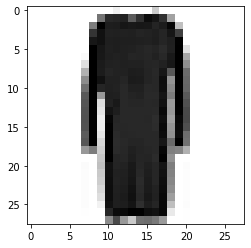

In [150]:
index=25
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.title(class_names[X_test[index]])

### Building

* Input Shape = (28,28)
* Output Shape= (10)
* Loss Function = "CategoricalCrossentropy"
* Output Activation Function = "Softmax"

In [151]:
X_train[0].shape, X_train.shape

((28, 28), (60000, 28, 28))

In [152]:
class_names, len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [157]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [161]:
tf.one_hot(y_train[:10])

AttributeError: ignored

### Building the model

> We have to use *SparseCategoricalCrossentropy()* as the loss function instead of *CategoricalCrossentropy* because the labels(y values) are in *integer* format and not *one-hot-encoded*. 

> If the labels were *one-hot-encoded* then we could have used the *CategoricalCrossentropy* as the loss function here.

In [160]:
tf.random.set_seed(42)

model_5= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_5= model_5.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_ac

In [162]:
model_5.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 4)                 3140      
                                                                 
 dense_79 (Dense)            (None, 4)                 20        
                                                                 
 dense_80 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [163]:
X_train.min(), X_train.max()

(0, 255)

### Scalling/Normalizing the data

In [166]:
X_train/255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [169]:
X_train_scaled=X_train/255.0
X_test_scaled= X_test/255.0

In [171]:
X_train_scaled.min(), X_train_scaled.max(), X_test_scaled.min(), X_test_scaled.max()

(0.0, 1.0, 0.0, 1.0)

In [174]:
tf.random.set_seed(42)

model_5_scaled= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_5_scaled.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_5_scaled= model_5_scaled.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac